# LSTM 구조 복습

In [4]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optimy
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [5]:
class Model(nn.Module):
    def __init__(self, input, output, hidden):
        self.lstm=nn.LSTM(input, hidden, batch_first=True)
        self.fc=nn.Linear(hidden, output)

    def forward(self,x):
        out,(hn,cn)=self.lstm(x)
        # out: (batch, seq_len, hidden_size)
        # take the last time-step
        last=out[:,-1,:]
        return self.fc(last)

In [6]:
#Toy 시계열 실습: 사인파 예측 비교
def sin_data(seq_len,num_sample):
    x=np.linspace(0,2*np.pi,num_sample+seq_len)
    data=np.sin(x)
    x,y=[],[]
    for i in range(num_sample):
        x.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    x=np.array(x)[:,:,None]
    y=np.array(y)[:,None]
    return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)



In [10]:
class RNNM(nn.Module):
    def __init__(self,hid):
        super().__init__()
        self.rnn=nn.RNN(1,hid,batch_first=True)
        self.fc=nn.Linear(hid,1)
    def forward(self, x):
        out,_=self.rnn(x)
        return self.fc(out[:,-1,:])


class LSTMM(nn.Module):
    def __init__(self, hidden):
        super().__init__()
        self.lstm=nn.LSTM(1, hidden, batch_first=True)
        self.fc=nn.Linear(hidden, 1)
    def forward(self, x):
        out,_ =self.lstm(x)
        last=self.fc(out[:,-1,:])
        return last



In [20]:
num_sample=1000
for seq_len in [20, 40, 80]:
    rnn_losses, lstm_losses = [], []

    x,y=sin_data(seq_len, num_sample)
    train_size=int(0.8*num_sample)
    train_ds=TensorDataset(x[:train_size],y[:train_size])
    train_loader=DataLoader(train_ds, batch_size=32, shuffle=True)


In [22]:
seq_len, num_samples = 60, 1000
X, Y = sin_data(seq_len, num_samples)
train_size = int(0.8 * num_samples)
train_ds = TensorDataset(X[:train_size], Y[:train_size])
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

In [24]:
hidden=32
type_rnn=RNNM(hidden)
type_lstm=LSTMM(hidden)

criter=nn.MSELoss()
rnn_optim=optimy.Adam(type_rnn.parameters(), lr=0.01)
lstm_optim=optimy.Adam(type_lstm.parameters(), lr=0.01)

num_epoch=50


In [26]:
type_rnn

RNNM(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [28]:
type_lstm

LSTMM(
  (lstm): LSTM(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [218]:
#type_rnn.train()
#type_lstm.train()
for epoch in range(num_epoch):
    total_rnn, total_lstm=0,0
    
    for xb, yb in train_loader:
        rnn_optim.zero_grad()
        out_R=type_rnn(xb)
        loss_R=criter(out_R,yb)
        loss_R.backward()
        rnn_optim.step()
        total_rnn+=loss_R.item()*xb.size(0)

        lstm_optim.zero_grad()
        out_L=type_lstm(xb)
        loss_L=criter(out_L,yb)
        loss_L.backward()
        lstm_optim.step()
        total_lstm+=loss_L.item()*xb.size(0)

    print(epoch)
    rnn_losses.append(total_rnn/train_size)
    lstm_losses.append(total_lstm/train_size)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


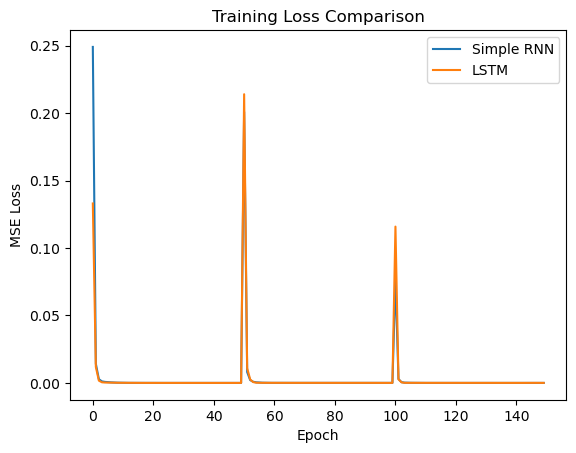

In [219]:
plt.figure()
plt.plot(rnn_losses, label="Simple RNN")
plt.plot(lstm_losses, label="LSTM")
plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


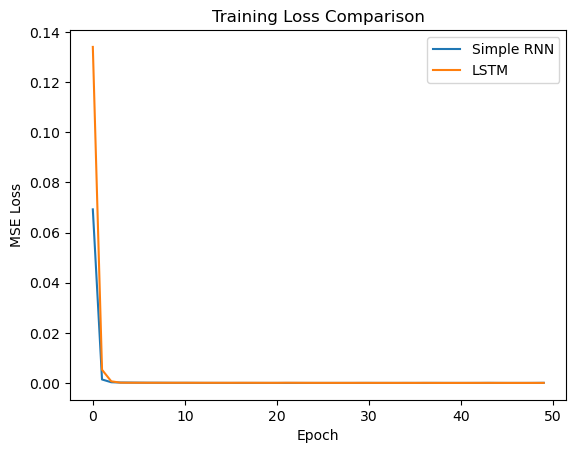

In [150]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 1) 사인파 데이터 생성
def create_sine_data(seq_len, num_samples):
    x = np.linspace(0, 2*np.pi, num_samples + seq_len)
    data = np.sin(x)
    X, Y = [], []
    for i in range(num_samples):
        X.append(data[i:i+seq_len])
        Y.append(data[i+seq_len])
    X = np.array(X)[:, :, None]  # (num_samples, seq_len, 1)
    Y = np.array(Y)[:, None]     # (num_samples, 1)
    return torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.float32)

seq_len, num_samples = 60, 1000
X, Y = create_sine_data(seq_len, num_samples)
train_size = int(0.8 * num_samples)
train_ds = TensorDataset(X[:train_size], Y[:train_size])
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

# 2) 모델 정의
class RNNModel(nn.Module):
    def __init__(self, hid):
        super().__init__()
        self.rnn = nn.RNN(1, hid, batch_first=True)
        self.fc  = nn.Linear(hid, 1)
    def forward(self, x):
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])

class LSTMModel(nn.Module):
    def __init__(self, hid):
        super().__init__()
        self.lstm = nn.LSTM(1, hid, batch_first=True)
        self.fc   = nn.Linear(hid, 1)
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

hid = 32
rnn_model  = RNNModel(hid)
lstm_model = LSTMModel(hid)
criterion  = nn.MSELoss()
rnn_opt    = optim.Adam(rnn_model.parameters(), lr=0.01)
lstm_opt   = optim.Adam(lstm_model.parameters(), lr=0.01)

# 3) 학습 루프 & 손실 기록
epochs = 50
rnn_losses, lstm_losses = [], []

for epoch in range(epochs):
    rnn_model.train(); lstm_model.train()
    total_rnn, total_lstm = 0, 0
    for xb, yb in train_loader:
        # RNN
        rnn_opt.zero_grad()
        loss_rnn = criterion(rnn_model(xb), yb)
        loss_rnn.backward()
        rnn_opt.step()
        total_rnn += loss_rnn.item() * xb.size(0)
        # LSTM
        lstm_opt.zero_grad()
        loss_lstm = criterion(lstm_model(xb), yb)
        loss_lstm.backward()
        lstm_opt.step()
        total_lstm += loss_lstm.item() * xb.size(0)

    rnn_losses.append(total_rnn / train_size)
    lstm_losses.append(total_lstm / train_size)

# 4) 학습 곡선 시각화
plt.figure()
plt.plot(rnn_losses, label="Simple RNN")
plt.plot(lstm_losses, label="LSTM")
plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


In [32]:
#Gradient Clipping (기울기 클리핑)
#역전파 중에 계산된 기울기(gradient)의 크기가 너무 커지면, 이를 미리 지정한 최대값(max_norm)으로 “잘라서” 전파합니다.
#폭발적으로 커지는 기울기를 억제해 학습이 발산하는 것을 막아 줍니다.

import torch.nn.utils as utils

for epoch in range(num_epoch):
    total_rnn, total_lstm=0,0
    
    for xb, yb in train_loader:
        rnn_optim.zero_grad()
        out_R=type_rnn(xb)
        loss_R=criter(out_R,yb)
        loss_R.backward()
        utils.clip_grad_norm_(type_rnn.parameters(), max_norm=1.0)
        #loss_R.backward()
        rnn_optim.step()
        total_rnn+=loss_R.item()*xb.size(0)

        lstm_optim.zero_grad()
        out_L=type_lstm(xb)
        loss_L=criter(out_L,yb)
        loss_L.backward()
        utils.clip_grad_norm_(type_lstm.parameters(), max_norm=1.0)
        #loss_L.backward()
        lstm_optim.step()
        total_lstm+=loss_L.item()*xb.size(0)

    print(epoch)
    rnn_losses.append(total_rnn/train_size)
    lstm_losses.append(total_lstm/train_size)


'''
loss.backward()
utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
optim.step()

clip_grad_norm_(parameters, max_norm)

각 파라미터의 gradient 벡터를 모아 전체 노름이 max_norm이 넘으면 스케일링하여 줄여 줍니다.


'''

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


'\nloss.backward()\nutils.clip_grad_norm_(model.parameters(), max_norm=1.0)\noptim.step()\n'

In [36]:
#적절한 가중치 초기화 (Weight Initialization)
#RNN의 순환 행렬(W_{hh})이 너무 작거나 크면, 역전파 시 반복 곱셈에서 기울기가 빠르게 사라지거나 폭발합니다.
#Xavier/Glorot, He 초기화 등으로 입력과 출력 채널 수에 맞춰 분산을 조절하면, 학습 초반부터 기울기가 적절한 범위에 있게 됩니다.
import torch.nn as nn
def init_weight(m):
    if isinstance(m,(nn.Linear, nn.Conv2d)):
        # Xavier 초기화
        nn.init.xavire_uniform(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)
    elif isinstance(m,nn.RNN)or isinstance(m,nn.LSTM)or isinstance(m,nn.GRU):
        for name, param in m.names_parameters():
            if 'weight_ih' in name:
                nn.init.xavier_uniform(param)
            elif 'weight_hh' in name:
                nn.init.orthogonal_(param)
            elif 'bias' in name:
                nn.init.zeros_(param)

type_lstm.apply(init_weight)

AttributeError: 'LSTM' object has no attribute 'names_parameters'

In [ ]:
#Gated RNN 구조로 전환 (LSTM / GRU)
#Simple RNN은 은닉 상태 업데이트가 단일tanh 연산으로만 이뤄져, 반복될수록 기울기가 사라집니다.
#LSTM/GRU는 forget/input/output 게이트를 도입해, 기울기를 셀 상태로 직접 흘려보낼 수 있게 설계되어 있습니다.

rnn=nn.LSTM(input, hidden, batch_first=True)
gru=nn.GRU(input, hidden, batch_first=True)

#LSTM/GRU는 내부적으로 gate 구조 덕분에 장기 의존성 학습을 안정적으로 수행합니다

In [ ]:
#짧은 BPTT 구간 사용 (Truncated BPTT)
#전체 길이T를 한 번에 역전파하지 않고, 일정 길이 k≪T 단위로 나눠서 순환합니다.

#너무 긴 시퀀스에 대해 기울기 소실/폭발이 누적되는 것을 방지합니다.

h,c =None, None
for i in range(0, seq_len, k):
    xb=x[:,i:i+k,:]
    out,_(h,c)=lstm(xb,(h,c))# h,c는 detach()로 연결 끊고 다음 구간에 넘김
    h,c= h.detach(),c.detach()

In [42]:
import torch.nn as nn

def init_weights(m):
    if isinstance(m, (nn.Linear, nn.Conv2d)):
        # 1) Xavier 균등 초기화
        nn.init.xavier_uniform_(m.weight)
        # 2) 또는 He 정규 초기화
        # nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
        
        if m.bias is not None:
            nn.init.zeros_(m.bias)

model.apply(init_weights)



NameError: name 'model' is not defined

Xavier/Glorot: fan_in + fan_out 고려, 대칭 활성화 함수에 적합

He/Kaiming: fan_in만 고려, ReLU 계열에 최적화

| 활성화 함수           | 권장 초기화                  |
|-------------------|---------------------------|
| **sigmoid**, **tanh** | Xavier (Glorot)          |
| **ReLU**, **LeakyReLU** | He (Kaiming)            |
| **ELU**, **SELU**     | SELU는 자체 논문에서 제안하는 Lecun 초기화 권장 |

| 대처법                  | 효과                                                         |
|-----------------------|------------------------------------------------------------|
| **Gradient Clipping** | 기울기 폭발 억제 → 학습이 발산하는 현상 방지                       |
| **적절한 초기화**       | 초반 기울기 분포 안정화 → 소실/폭발 문제 완화                     |
| **Gated RNN (LSTM/GRU)** | 게이트 구조로 장기 의존성 학습 안정화 → 소실 문제 근본 해결               |
| **Truncated BPTT**    | 시퀀스를 작은 구간으로 나눠 역전파 → 누적 소실/폭발 방지            |

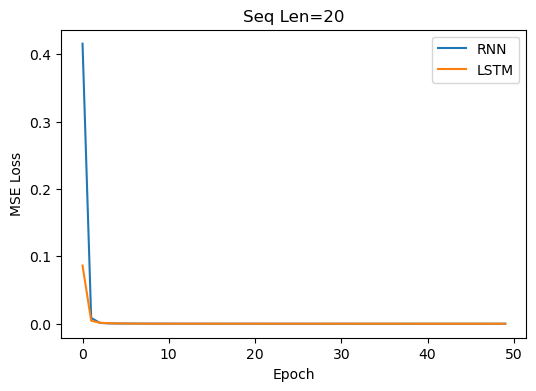

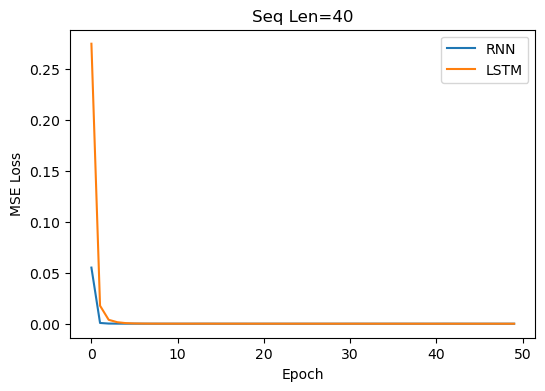

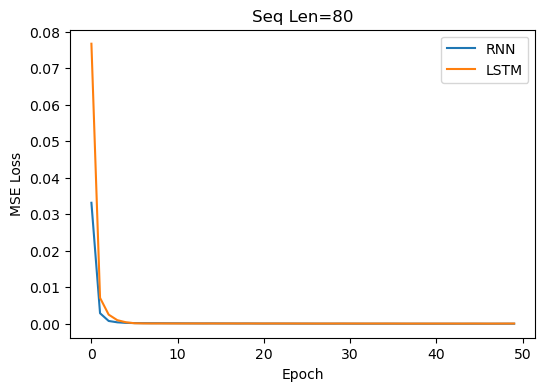

In [47]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# ─── 1) 데이터 생성 함수 ───
def sin_data(seq_len, num_samples):
    x = np.linspace(0, 2*np.pi, num_samples + seq_len)
    data = np.sin(x)
    X, Y = [], []
    for i in range(num_samples):
        X.append(data[i:i+seq_len])
        Y.append(data[i+seq_len])
    X = np.array(X)[:, :, None]  # (num_samples, seq_len, 1)
    Y = np.array(Y)[:, None]     # (num_samples, 1)
    return torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.float32)

# ─── 2) Weight Initialization 함수 ───
def init_weights(m):
    # Linear 계층 초기화
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)   # Xavier 균등 초기화
        if m.bias is not None:
            nn.init.zeros_(m.bias)
    # RNN/LSTM 내부 가중치 초기화
    elif isinstance(m, (nn.RNN, nn.LSTM)):
        for name, param in m.named_parameters():
            if 'weight_ih' in name:
                nn.init.xavier_uniform_(param)   # 입력-히든 가중치
            elif 'weight_hh' in name:
                nn.init.orthogonal_(param)       # 히든-히든 가중치
            elif 'bias' in name:
                nn.init.zeros_(param)

# ─── 3) 모델 정의 ───
class RNNM(nn.Module):
    def __init__(self, hidden):
        super().__init__()
        self.rnn = nn.RNN(1, hidden, batch_first=True)
        self.fc  = nn.Linear(hidden, 1)
    def forward(self, x):
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])

class LSTMM(nn.Module):
    def __init__(self, hidden):
        super().__init__()
        self.lstm = nn.LSTM(1, hidden, batch_first=True)
        self.fc   = nn.Linear(hidden, 1)
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

# ─── 4) 실험 루프 ───
num_samples = 1000
hidden_size = 8
num_epochs  = 50

for seq_len in [20, 40, 80]:
    # 데이터 준비
    X, Y = sin_data(seq_len, num_samples)
    train_size = int(0.8 * num_samples)
    train_ds = TensorDataset(X[:train_size], Y[:train_size])
    train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

    # 모델 초기화
    rnn_model  = RNNM(hidden_size)
    lstm_model = LSTMM(hidden_size)
    # ── 여기서 Weight Initialization 적용 ──
    rnn_model.apply(init_weights)
    lstm_model.apply(init_weights)

    # 손실, 옵티마이저
    criterion   = nn.MSELoss()
    rnn_opt     = optim.Adam(rnn_model.parameters(),  lr=0.01)
    lstm_opt    = optim.Adam(lstm_model.parameters(), lr=0.01)

    # 학습 기록용
    rnn_losses, lstm_losses = [], []

    # 학습 루프
    for epoch in range(num_epochs):
        total_rnn, total_lstm = 0.0, 0.0

        for xb, yb in train_loader:
            # RNN 학습
            rnn_opt.zero_grad()
            out_r = rnn_model(xb)
            loss_r = criterion(out_r, yb)
            loss_r.backward()
            rnn_opt.step()
            total_rnn += loss_r.item() * xb.size(0)

            # LSTM 학습
            lstm_opt.zero_grad()
            out_l = lstm_model(xb)
            loss_l = criterion(out_l, yb)
            loss_l.backward()
            lstm_opt.step()
            total_lstm += loss_l.item() * xb.size(0)

        rnn_losses.append(total_rnn / train_size)
        lstm_losses.append(total_lstm / train_size)

    # 손실 곡선 시각화
    plt.figure(figsize=(6,4))
    plt.plot(rnn_losses,  label="RNN")
    plt.plot(lstm_losses, label="LSTM")
    plt.title(f"Seq Len={seq_len}")
    plt.xlabel("Epoch"); plt.ylabel("MSE Loss")
    plt.legend()
    plt.show()


init_weights 안에서 nn.init.xavier_uniform_, nn.init.orthogonal_ 등을 사용해 각 레이어 가중치를 초기화합니다.

model.apply(init_weights)를 호출하면, 모델 내부의 모든 서브모듈에 대해 init_weights가 실행됩니다.

이렇게 초기화만 잘 해 줘도 학습 초반의 기울기 소실/폭발 문제를 완화하고, 수렴 속도를 개선할 수 있음

# 실습

In [93]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
df=sns.load_dataset("flights")
print(df)
series=df['passengers'].values.astype(np.float32)
min_val, max_val=series.min(), series.max()
series_norm=(series-min_val)/(max_val-min_val)


     year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]


In [97]:
print(series_norm)

[0.01544402 0.02702703 0.05405406 0.04826255 0.03281853 0.05984556
 0.08494209 0.08494209 0.06177606 0.02895753 0.         0.02702703
 0.02123552 0.04247104 0.07142857 0.05984556 0.04054054 0.08687259
 0.12741312 0.12741312 0.1042471  0.05598456 0.01930502 0.06949807
 0.07915058 0.08880309 0.14285715 0.11389961 0.13127413 0.14285715
 0.18339768 0.18339768 0.15444015 0.11196911 0.08108108 0.11969112
 0.12934363 0.14671814 0.17181467 0.14864865 0.15250966 0.22007722
 0.24324325 0.26640928 0.2027027  0.16795367 0.13127413 0.17374517
 0.17760618 0.17760618 0.25482625 0.25289574 0.24131274 0.26833978
 0.3088803  0.3243243  0.25675675 0.20656371 0.14671814 0.18725869
 0.19305019 0.16216215 0.25289574 0.23745173 0.25096524 0.3088803
 0.38223937 0.36486486 0.2992278  0.24131274 0.19111969 0.24131274
 0.26640928 0.24903475 0.3146718  0.31853282 0.32046333 0.4073359
 0.5019305  0.46911198 0.4015444  0.32818532 0.25675675 0.33590734
 0.34749034 0.33397684 0.41119692 0.4034749  0.41312742 0.521235

In [99]:
def creat_seq(data, seq_len):
    x,y=[],[]
    for i in range(len(data)-seq_len):
        x.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    x=np.array(x)[:,:,None]
    y=np.array(y)[:,None]
    return torch.tensor(x), torch.tensor(y)



In [101]:
seq_len = 12
x,y=creat_seq(series_norm, seq_len)
split=int(0.8*len(x))
x_train, y_train=x[:split],y[:split]
x_test,y_test=x[split:],y[split:]

train_loader=DataLoader(TensorDataset(x_train, y_train), batch_size=16, shuffle=True)
test_loader=DataLoader(TensorDataset(x_test, y_test), batch_size=16, shuffle=True)

In [103]:
class LSTMM(nn.Module):
    def __init__(self, hidden=32):
        super().__init__()
        self.lstm=nn.LSTM(input_size=1, hidden_size=hidden, batch_first=True)
        self.fc=nn.Linear(hidden, 1)
    def forward(self,x):
        out,_=self.lstm(x)
        last=out[:,-1,:]
        return self.fc(last)
        

In [117]:
model=LSTMM(hidden=32)
criter=nn.MSELoss()
optimy=optim.Adam(model.parameters(), lr=0.01)

num_epoch=50

train_loss=[]

In [119]:
for epoch in range(num_epoch):
    model.train()
    total_loss=0.0
    for data, target in train_loader:
        optimy.zero_grad()
        out=model(data)
        loss=criter(out, target)
        loss.backward()
        optimy.step()
        total_loss+=loss.item()*data.size(0)
        
    train_loss.append(total_loss/len(train_loader.dataset))

In [120]:
model.eval()
pred=[]
with torch.no_grad():
    for data, target in test_loader:
        pred.extend(model(data).squeeze().tolist())

pred=np.array(pred)*(max_val-min_val)+min_val
act=series[split+seq_len:]

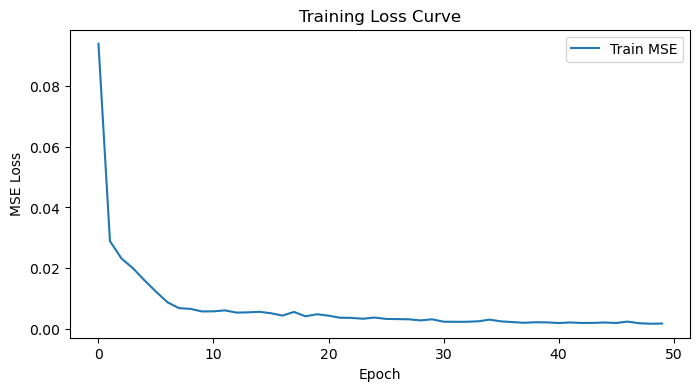

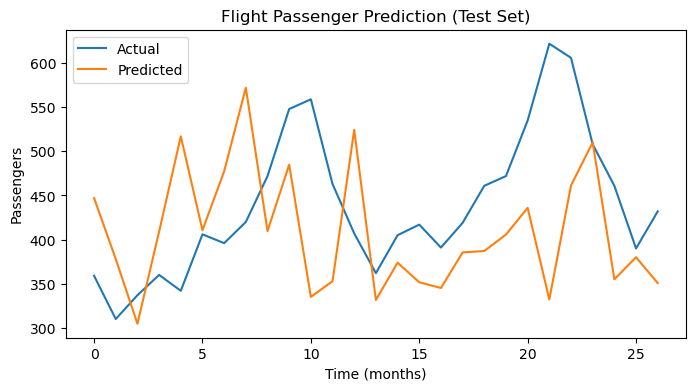

In [121]:
plt.figure(figsize=(8,4))
plt.plot(train_loss, label="Train MSE")
plt.xlabel("Epoch"); plt.ylabel("MSE Loss"); plt.legend()
plt.title("Training Loss Curve")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(act, label="Actual")
plt.plot(pred,  label="Predicted")
plt.xlabel("Time (months)"); plt.ylabel("Passengers")
plt.title("Flight Passenger Prediction (Test Set)")
plt.legend()
plt.show()

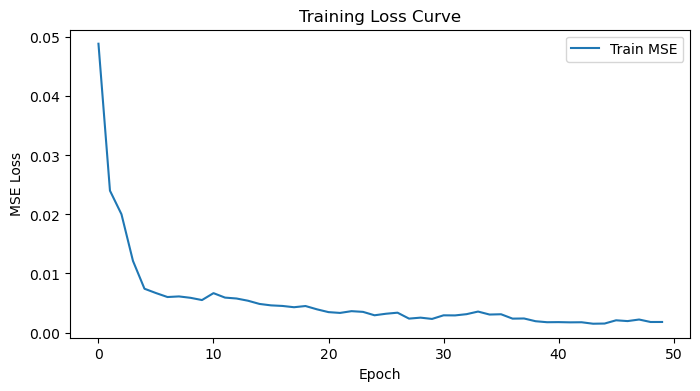

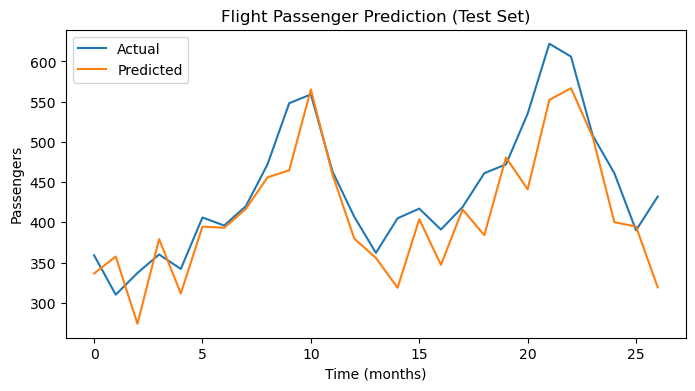

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 1) 데이터 불러오기 & 정규화
df = sns.load_dataset("flights")               # seaborn 내장 데이터셋
series = df['passengers'].values.astype(np.float32)
min_val, max_val = series.min(), series.max()
series_norm = (series - min_val) / (max_val - min_val)

# 2) 슬라이딩 윈도우로 시퀀스 생성
def create_sequences(data, seq_len):
    X, Y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        Y.append(data[i+seq_len])
    X = np.array(X)[:, :, None]  # (N, seq_len, 1)
    Y = np.array(Y)[:, None]     # (N, 1)
    return torch.tensor(X), torch.tensor(Y)

seq_len = 12
X, Y = create_sequences(series_norm, seq_len)
split = int(0.8 * len(X))
X_train, Y_train = X[:split], Y[:split]
X_test,  Y_test  = X[split:], Y[split:]

train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=16, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test,  Y_test),  batch_size=16, shuffle=False)

# 3) LSTM 모델 정의
class FlightLSTM(nn.Module):
    def __init__(self, hidden_size=32):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc   = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)            # out: (B, seq_len, hidden_size)
        last = out[:, -1, :]             # 마지막 시점 은닉 상태
        return self.fc(last)             # (B, 1)

model = FlightLSTM(hidden_size=32)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4) 학습 루프
num_epochs = 50
train_losses = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss  = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    train_losses.append(total_loss / len(train_loader.dataset))

# 5) 테스트 예측 및 복원
model.eval()
preds = []
with torch.no_grad():
    for xb, _ in test_loader:
        preds.extend(model(xb).squeeze().tolist())

preds = np.array(preds) * (max_val - min_val) + min_val
actual = series[split + seq_len:]

# 6) 시각화
plt.figure(figsize=(8,4))
plt.plot(train_losses, label="Train MSE")
plt.xlabel("Epoch"); plt.ylabel("MSE Loss"); plt.legend()
plt.title("Training Loss Curve")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(actual, label="Actual")
plt.plot(preds,  label="Predicted")
plt.xlabel("Time (months)"); plt.ylabel("Passengers")
plt.title("Flight Passenger Prediction (Test Set)")
plt.legend()
plt.show()


In [ ]:
|